# Honey Bees Classification using Transfer Learning

## Dataset Collection:
### Gather-a-dataset-that-is-only-focused-on-classifying-images-of-honey-bees.-Verify-that-the-dataset-is-appropriately-categorized-into-four-distinct-classes,-each-representing-various-aspects-of-honey-bees,-such-as-different-species,-activities,-or-health-conditions.

## Dataset Preprocessing:
### Perform-dataset-preprocessing-by-uniformly-scaling-photos,-standardizing-pixel-values,-and-dividing-it-into-separate-sets-for-training,-validation,-and-testing.

## Choose a Pre-trained Model:
### Choose-an-appropriate-pre-trained-deep-learning-model-for-the-task-of-picture-classification.-Popular-possibilities-for-models-include-VGG16,-ResNet,-and-MobileNet.-These-models-have-undergone-pre-training-on-extensive-datasets-and-can-be-further-customized-for-specific-tasks-through-fine-tuning.

## Modify Model Architecture:
### Modify-the-uppermost-layers-of-the-pre-trained-model-to-align-with-the-quantity-of-categories-in-your-honey-bee-dataset.-Substitute-or-include-an-additional-completely-connected-layer-to-do-the-final-categorization.-Immobilize-the-weights-of-the-pre-trained-layers-to-preserve-valuable-features.

## Fine-tuning:
### Refine-the-adjusted-model-using-the-training-dataset.-Employ-a-reduced-learning-rate-to-adjust-the-preexisting-features-to-the-distinct-attributes-of-honey-bee-photos.-By-undergoing-fine-tuning,-the-model-acquires-the-ability-to-specialize-in-the-new-categorization-task.

## Validation and Hyperparameter Tuning:
### Utilize-the-validation-set-to-oversee-and-evaluate-the-model's-performance-during-the-training-process.-Tweak-hyperparameters,-such-as-learning-rate,-batch-size,-and-regularization,-according-to-the-validation-results-in-order-to-enhance-generalization.

## Evaluation Metrics:
### Assess-the-model's-performance-on-the-test-set-by-utilizing-criteria-such-as-accuracy,-precision,-recall,-and-F1-score.-These-metrics-offer-valuable-insights-into-the-model's-efficacy-in-categorizing-honey-bee-photos-into-the-four-predetermined-classes.

## Extracting-the-contents-of-the-"bees.zip"-file-requires-the-whole-command.-The-contents of-the-zip-archive-will-be-copied-to-the-current-working-directory-when-this-cell-is-executed.

In [2]:
# Use-the-!unzip-command-to-extract-the-contents-of-the-zip-file.
!unzip "/content/drive/MyDrive/Vipin_Vinod_assignment/bees.zip"

Streaming output truncated to the last 5000 lines.
  inflating: bees/test/category1/010_657.png  
  inflating: bees/test/category1/010_706.png  
  inflating: bees/test/category1/010_718.png  
  inflating: bees/test/category1/010_721.png  
  inflating: bees/test/category1/010_731.png  
  inflating: bees/test/category1/010_752.png  
  inflating: bees/test/category1/010_778.png  
  inflating: bees/test/category1/010_779.png  
  inflating: bees/test/category1/010_782.png  
  inflating: bees/test/category1/010_793.png  
  inflating: bees/test/category1/010_794.png  
  inflating: bees/test/category1/010_797.png  
  inflating: bees/test/category1/010_800.png  
  inflating: bees/test/category1/010_805.png  
  inflating: bees/test/category1/010_821.png  
  inflating: bees/test/category1/010_827.png  
  inflating: bees/test/category1/010_834.png  
  inflating: bees/test/category1/010_842.png  
  inflating: bees/test/category1/010_843.png  
  inflating: bees/test/category1/012_012.png  
  inflati

## This-code-seems-to-configure-a-Keras-based-deep-learning-environment-for-picture-categorization-jobs.-It-uses-a-number-of-libraries-to-process-images,-generate-models,-and-measure-performance.-While-this-code-does-not-feature-dataset-specific-functionality,-it-does-contain-components-for-image-loading,-Xception-architecture-neural-network-construction,-model-training,-and-results-evaluation.

In [3]:
# Import-necessary-libraries
# For-file-path-matching
import glob

# For-operating-system-related-operations
import os

# OpenCV-for-image-processing
import cv2

# For-randomization
import random

# For-plotting
import matplotlib.pyplot as plt

# NumPy-for-numerical-operations
import numpy as np

# Pandas-for-data-manipulation
import pandas as pd

# To-suppress-warnings
import warnings

# tqdm-is-used-for-showing-progress-bars-during-loops
from tqdm import tqdm

# Import-specific-modules-from-Keras-for-building-the-neural-network
# Pre-trained-Xception-model
from keras.applications import Xception

# Sequential-and-Model-for-neural-network-modeling
from keras.models import Sequential, Model

# Layers-for-the-neural-network
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# For-plotting-the-neural-network-architecture
from keras.utils import plot_model

# For-splitting-data-into-training-and-testing-sets
from sklearn.model_selection import train_test_split

# For-one-hot-encoding-of-labels
from keras.utils import to_categorical

# For-saving-the-best-model-during-training
from keras.callbacks import ModelCheckpoint

# For-loading-a-saved-model
from keras.models import load_model

# Import-metrics-and-tools-for-evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

# For-plotting-confusion-matrices
from mlxtend.plotting import plot_confusion_matrix

# For-label-binarization
from sklearn.preprocessing import LabelBinarizer

# ROC-curve-metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc

## Shows-the-rearranged-directory-of-all-the-files.-To-load-and-process-photos-for-a-machine-learning-task,-for-example,-this-might-be-utilised-for-additional-processing.

In [4]:
# Use-glob-to-get-a-list-of-all-file-paths-in-the-training-set
honey_bees_train_data = glob.glob('/content/bees/train/**/**')

# Use-glob-to-get-a-list-of-all-file-paths-in-the-validation-set
honey_bees_val_data = glob.glob('/content/bees/validate/**/**')

# Combine-the-training-and-validation-file-paths-into-a-single-list
honey_bees_data = honey_bees_train_data+honey_bees_val_data

# Shuffle-the-combined-list-to-introduce-randomness
random.shuffle(honey_bees_data)

# Display-the-shuffled-list-of-file-paths
honey_bees_data

['/content/bees/train/category1/046_103.png',
 '/content/bees/train/category3/030_670.png',
 '/content/bees/train/category0/041_072.png',
 '/content/bees/train/category2/040_137.png',
 '/content/bees/train/category1/019_879.png',
 '/content/bees/train/category0/042_027.png',
 '/content/bees/train/category1/016_200.png',
 '/content/bees/validate/category2/040_474.png',
 '/content/bees/train/category1/022_426.png',
 '/content/bees/train/category0/037_023.png',
 '/content/bees/train/category2/038_020.png',
 '/content/bees/train/category1/046_047.png',
 '/content/bees/validate/category3/030_736.png',
 '/content/bees/train/category2/036_107.png',
 '/content/bees/train/category1/008_236.png',
 '/content/bees/train/category1/017_127.png',
 '/content/bees/train/category1/010_542.png',
 '/content/bees/train/category1/015_1249.png',
 '/content/bees/train/category1/021_162.png',
 '/content/bees/train/category1/015_288.png',
 '/content/bees/train/category2/031_049.png',
 '/content/bees/train/categ

In [5]:
# display-total-number-of-images-in-dataset
print("Total number of images : ", len(honey_bees_data))

Total number of images :  4643


## In-general,-this-code-parses-the-honey-bees-data-list-of-file-paths,-finds-the-categories-for-the-images,-and-stores-the-names-of-the-images-in-the-img_category-and-img_file_name-lists,-respectively.-You-can-use-these-lists-as-labels-for-a-machine-learning-task-or-for-additional-analysis.

In [6]:
# Create empty lists to store image file names and categories
img_file_name = []
img_category = []

# Iterate through the indices using tqdm for progress tracking
for i in tqdm(range(len(honey_bees_data))):
    # Extract the file name by splitting the path using the os.path.sep
    img_file_name.append(honey_bees_data[i].split(os.path.sep)[-1])

    # Extract the category by taking the second-to-last element in the path
    img_category.append(honey_bees_data[i].split(os.path.sep)[-2])

100%|██████████| 4643/4643 [00:00<00:00, 629050.76it/s]


## To-facilitate-a-range-of-data-operations-and-analysis,-this-code-transforms-the-lists-of-picture-file-names-and-classifications-into-a-Pandas-DataFrame.

## Next,-the-DataFrame's-initial-rows-are-displayed-using-the-head()-function.

In [7]:
# Create-a-DataFrame-using-Pandas-with-columns-'file_name'-and-'category'
honey_bees_data_df = pd.DataFrame({'file_name':img_file_name, 'category':img_category})

# Display-the-first-few-rows-of-the-DataFrame
honey_bees_data_df.head()

file_name   category
0   017_053.png  category1
1  015_1115.png  category1
2   022_261.png  category1
3   017_091.png  category1
4   032_062.png  category1

## In-essence,-this-code-is-making-a-grid-of-subplots,-loading-photographs-from-the-honey-bees-data-list,-and-showing-them-with-some-little-preprocessing-applied-for-visual-examination.

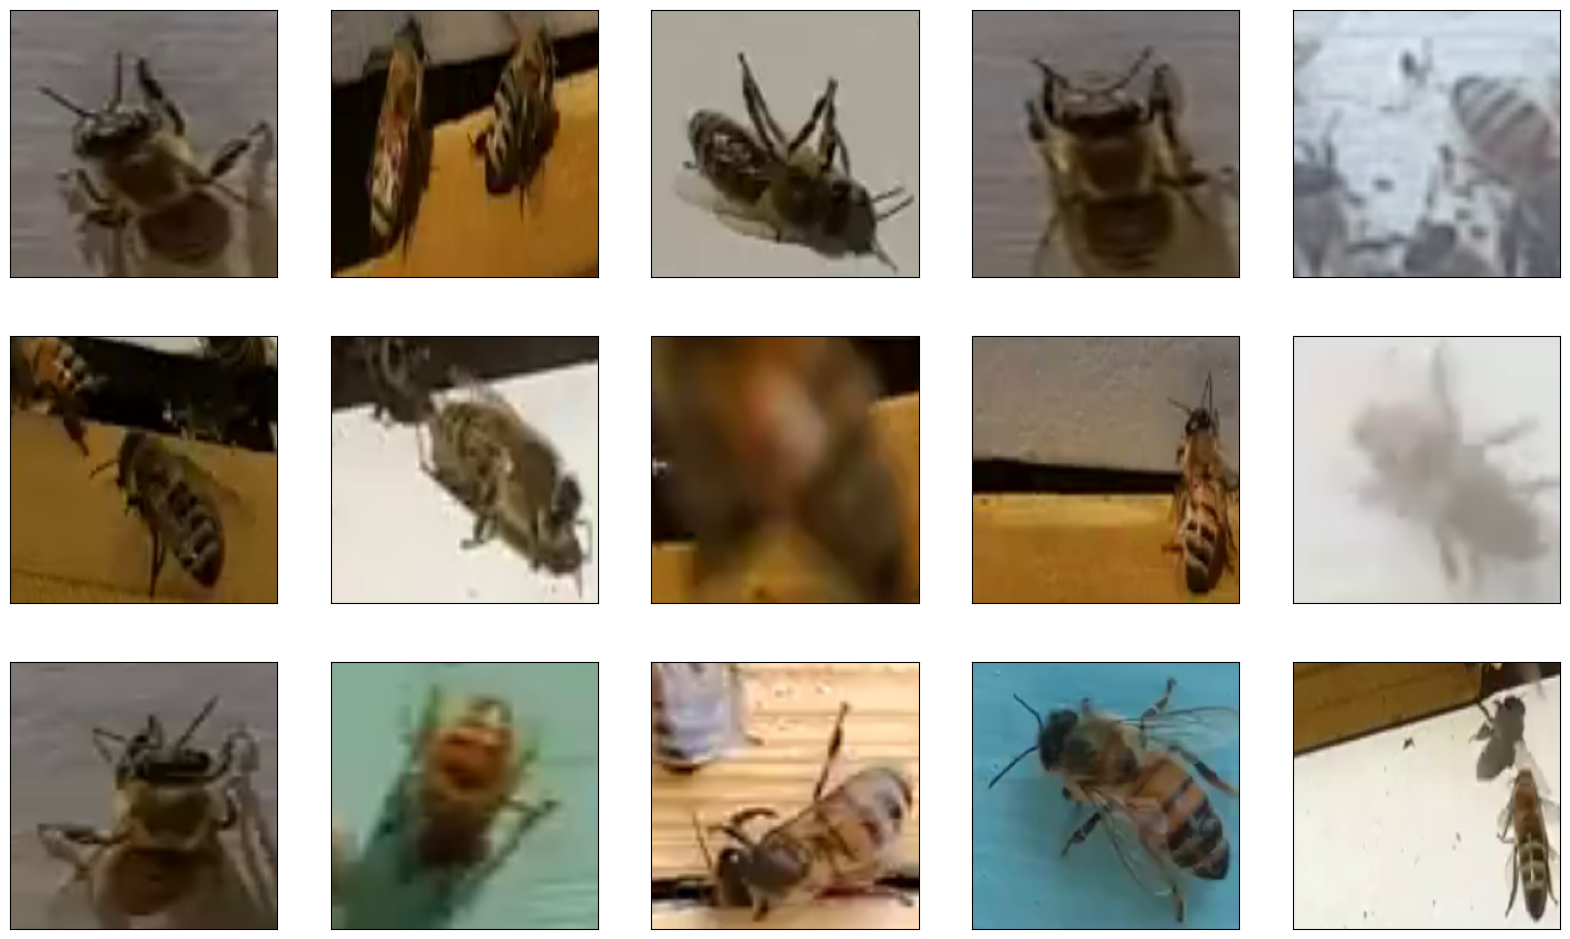

In [8]:
# Set-the-figure-size-for-the-entire-subplot-grid
plt.figure(figsize=(20, 12))

# Iterate-through-the-first-15-images-in-honey_bees_data
for i in range(15):
    # Create-subplots-in-a-3x5-grid
    plt.subplot(3, 5, i + 1)

    # Read-and-load-the-image-using-OpenCV
    img = cv2.imread(honey_bees_data[i])

    # Convert-the-image-from-BGR-to-RGB-color-space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize-the-image-to-224x224-pixels
    img = cv2.resize(img, (224, 224))

    # Display-the-image-in-the-subplot
    plt.imshow(img)

    # Remove-x-and-y-axis-labels-for-cleaner-visualization
    plt.xticks([])
    plt.yticks([]);

In [9]:
# count-the-images-in-each-category
honey_bees_data_df.groupby('category').count()

file_name
category            
category0        219
category1       3068
category2        946
category3        410

## A-bar-chart-displaying-the-quantity-of-photos-in-each-category-is-produced-by-this-code-using-the-'category'-column-in-the-honey_bees_data_df-DataFrame.

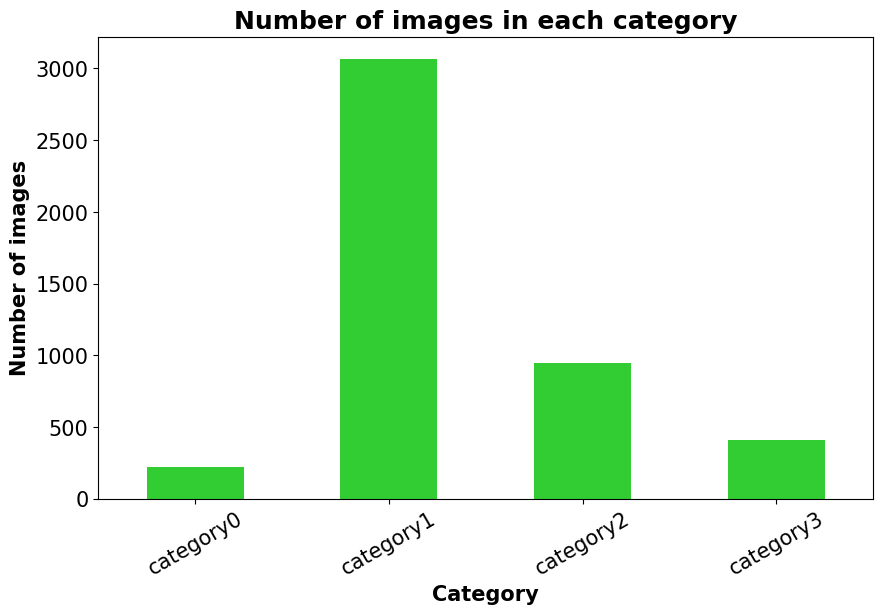

In [10]:
# Update-the-font-size-for-Matplotlib
plt.rcParams.update({'font.size': 15})

# Group-the-DataFrame-by-'category'-and-count-the-occurrences,-then-plot-a-bar-chart
honey_bees_data_df.groupby('category').count().plot(kind='bar', color='limegreen', figsize=(10, 6), rot=30)

# Set-the-title-of-the-plot
plt.title('Number of images in each category', fontweight='bold')

# Set-the-x-axis-label
plt.xlabel('Category', fontweight='bold')

# Set-the-y-axis-label
plt.ylabel('Number of images', fontweight='bold')

# Hide-the-legend-to-avoid-unnecessary-information
plt.legend().set_visible(False)

## For-tasks-involving-images,-this-method-makes-use-of-a-pre-trained-Xception-model-that-has-its-weights-trained-on-ImageNet.-Before-adding-a-custom-classification-head,-it-freezes-the-first-100-layers-to-keep-the-pre-trained-information.-A-Dense-layer-with-1024-units-and-ReLU-activation-is-part-of-this-head,-along-with-a-Global-Average-Pooling-layer-that-reduces-dimensionality.-A-four-class-classification-problem-is-met-by-the-four-unit-output-layer-with-softmax-activation.

In [ ]:
# Load-pre-trained-Xception-model-with-pre-trained-weights-on-ImageNet
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze-some-layers,-for-example,-the-first-100-layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Add-a-custom-head-for-your-specific-task,-e.g.,-classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)

# 4-is-the-number-of-classes-in-your-task
output = Dense(4, activation='softmax')(x)

# Create-a-new-model-with-the-Xception-base-and-the-custom-head
model = Model(inputs=base_model.input, outputs=output)

# Display-the-summary-of-the-model-architecture
model.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  

## After-executing-this-code,-a'model_plot.png'-file-will-be-created-to-display-the-model's-architecture-graphically.-The-neural-network-structure,-layer-connections,-and-model-design-may-all-be-better-understood-and-communicated-with-the-help-of-this-visualization.

In [ ]:
# Use-the-plot_model-function-to-generate-a-visualization-of-the-neural-network-architecture
plot_model(model, to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True, dpi = 200)

## The-lists-honey_bees_imgs-and-honey_bees_label-contain-the-processed-and-labelled-photos,-respectively,-that-this-code-reads.-You-can-train-a-deep-learning-model-with-these-lists.

In [7]:
# Create-empty-lists-to-store-images-and-corresponding-labels
honey_bees_imgs = []
honey_bees_label = []

# Iterate-through-the-indices-using-tqdm-for-progress-tracking
for i in tqdm(range(len(honey_bees_data))):
    # Read,-convert-color space,-and resize-the-image-using-OpenCV
    img = cv2.imread(honey_bees_data[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    # Append-the-preprocessed-image-to-the-list-of-images
    honey_bees_imgs.append(img)

    # Extract-the-category-from-the-file-path
    cat = honey_bees_data[i].split(os.path.sep)[-2]

    # Map-categories-to-numerical-labels-and-append-to-the-list-of-labels
    if cat == 'category0':
        honey_bees_label.append(0)
    elif cat == 'category1':
        honey_bees_label.append(1)
    elif cat == 'category2':
        honey_bees_label.append(2)
    elif cat == 'category3':
        honey_bees_label.append(3)

100%|██████████| 4643/4643 [00:01<00:00, 2326.77it/s]


## For-optimal-interoperability-with-various-machine-learning-frameworks,-such-as-Keras,-which-frequently-requires-array-formatted-input-data,-it-is-recommended-to-transform-the-data-to-NumPy-arrays.

In [8]:
# Convert-the-list-of-images-to-a-NumPy-array
honey_bees_imgs = np.array(honey_bees_imgs)

# Convert-the-list-of-labels-to-a-NumPy-array
honey_bees_label = np.array(honey_bees_label)

## By-dividing-the-data-into-a-training-set-and-a-testing-set,-you-can-gauge-your-machine-learning-model's-ability-to-generalize-to-new,-unknown-data.

In [9]:
# Split-the-data-into-training-and-testing-sets-using-train_test_split
X_bees_train, X_bees_test, y_bees_train, y_bees_test = train_test_split(honey_bees_imgs,
                                                                        honey_bees_label,
                                                                        test_size=0.2)

## The-labels-are-then-prepared-for-training-a-neural-network-to-perform-categorical-classification,-where-each-image-can-be-assigned-to-one-of-many-classes,-after-this-transformation.

In [10]:
# Convert-numerical-labels-to-one-hot-encoded-categorical-labels-using-to_categorical
y_bees_train = to_categorical(y_bees_train)
y_bees_test = to_categorical(y_bees_test)

## You-can-check-if-the-data-has-been-preprocessed-and-split-correctly-by-looking-at-the-shapes-of-the-datasets.-It-also-gives-you-a-good-idea-of-the-dimensions-that-will-be-utilized-for-training-and-evaluating-the-models.

In [11]:
# Print-the-shapes-of-the-training-and-testing-datasets
print("Training Data : ", X_bees_train.shape, y_bees_train.shape)
print("Testing Data  : ", X_bees_test.shape, y_bees_test.shape)

Training Data :  (3714, 224, 224, 3) (3714, 4)
Testing Data  :  (929, 224, 224, 3) (929, 4)


## The-following-hyperparameters-have-been-established-for-the-neural-network-training:-the-learning-rate-(lr)-is-defined-as-0.0001,-the-number-of-training-epochs-are-set-to-10,-and-the-batch-size-for-training-is-set-to-32.-For-jobs-involving-many-classes,-the-categorical-crossentropy-loss-function-(ls_fun)-is-selected.-The-model-is-then-built-using-the-compile-technique,-with-the-following-parameters:-the-Adam-optimizer's-learning-rate-is-defined,-the-measure-to-be-monitored-during-training-is-accuracy,-and-the-categorical-crossentropy-loss-is-supplied.

In [ ]:
# Import-necessary-modules-from-Keras
from keras.optimizers import Adam

# Set-hyperparameters-for-training
lr = 0.0001  # Learning-rate
epochs = 10  # Number-of-training-epochs
batch_size = 32  # Batch-size-for-training
ls_fun = 'categorical_crossentropy'  # Loss-function-for-categorical-classification

# Compile-the-model-with-specified-loss,-optimizer,-and-metrics
model.compile(loss=ls_fun,  # Categorical-crossentropy-loss-for-multiclass-classification
              optimizer=Adam(learning_rate=lr),  # Adam-optimizer-with-specified-learning-rate
              metrics=['accuracy'])  # Monitor-accuracy-during-training

## By-utilizing-the-warnings.filterwarnings('ignore')-line,-any-warnings-that-may-occur-during-training-will-be-disregarded.-To-further-ensure-that-the-most-accurate-model-is-saved-during-training,-a-ModelCheckpoint-callback-is-defined.-You-can-set-the-ModelCheckpoint-callback-to-save-only-the-top-model.

## The-training-method-makes-use-of-the-supplied-batch-size,-validation-data,-and-number-of-epochs.-You-may-make-sure-that-the-most-accurate-model-based-on-validation-is-saved-during-training-by-including-the-previously-created-ModelCheckpoint-callback-in-the-callbacks-parameter.

## Information-about-training-and-validation-loss-as-well-as-accuracy-for-each-epoch-is-kept-in-the-bees_model_his-variable,-which-is-part-of-the-training-history.

In [ ]:
# Ignore-warnings-during-training
warnings.filterwarnings('ignore')

# Define-a-ModelCheckpoint-callback-to-save-the-best-model-during-training
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Vipin_Vinod_assignment/honey_bees_model.h5',
                             save_best_only=True,  # Save-only-the-best-model-based-on-validation-accuracy
                             monitor='val_accuracy',  # Monitor-validation-accuracy-for-saving-the-best-model
                             verbose=1)  # Display-progress-information

# Train-the-model-and-store-the-training-history
bees_model_his = model.fit(X_bees_train,  # Training-features
                           y_bees_train,  # Training-labels
                           epochs=epochs,  # Number-of-epochs-for-training
                           batch_size=batch_size,  # Batch-size-for-training
                           validation_data=(X_bees_test, y_bees_test),  # Validation-data
                           callbacks=[checkpoint])  # List-of-callbacks,-including-ModelCheckpoint

Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.5124 - accuracy: 0.8156
Epoch 1: val_accuracy improved from -inf to 0.74381, saving model to /content/drive/MyDrive/Vipin_Vinod_assignment/honey_bees_model.h5
117/117 [==============================] - 48s 270ms/step - loss: 0.5124 - accuracy: 0.8156 - val_loss: 0.7189 - val_accuracy: 0.7438
Epoch 2/10
116/117 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.9227
Epoch 2: val_accuracy improved from 0.74381 to 0.76857, saving model to /content/drive/MyDrive/Vipin_Vinod_assignment/honey_bees_model.h5
117/117 [==============================] - 29s 251ms/step - loss: 0.2266 - accuracy: 0.9222 - val_loss: 0.6470 - val_accuracy: 0.7686
Epoch 3/10
116/117 [============================>.] - ETA: 0s - loss: 0.1620 - accuracy: 0.9437
Epoch 3: val_accuracy improved from 0.76857 to 0.93972, saving model to /content/drive/MyDrive/Vipin_Vinod_assignment/honey_bees_model.h5
117/117 [========================

## To-aid-in-evaluating-model-performance-and-possible-overfitting-or-underfitting,-the-function-is-built-to-give-a-rapid-visual-depiction-of-how-the-training-and-validation-metrics-evolve-over-the-specified-number-of-epochs.-Simply-send-the-training-history-and-the-desired-number-of-epochs-to-this-function,-and-it-will-do-its-job.

In [12]:
def plot_loss_curves(history, epochs):
    # Extract training and validation accuracy values from the training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Extract training and validation loss values from the training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a range of epochs for the x-axis
    epochs_range = range(epochs)

    # Create a figure with a specific size
    plt.figure(figsize=(15, 5))

    # Subplot 1: Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
    plt.legend(loc='lower right')  # Add legend in the lower right corner
    plt.title('Training and Validation Accuracy', fontsize=15, fontweight='bold')
    plt.xlabel("Epochs", fontsize=15, fontweight='bold')  # Label for the x-axis
    plt.ylabel("Accuracy", fontsize=15, fontweight='bold')  # Label for the y-axis

    # Subplot 2: Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
    plt.legend(loc='upper right')  # Add legend in the upper right corner
    plt.title('Training and Validation Loss', fontsize=15, fontweight='bold')
    plt.xlabel("Epochs", fontsize=15, fontweight='bold')  # Label for the x-axis
    plt.ylabel("Loss", fontsize=15, fontweight='bold')  # Label for the y-axis

    # Display the plot
    plt.show()

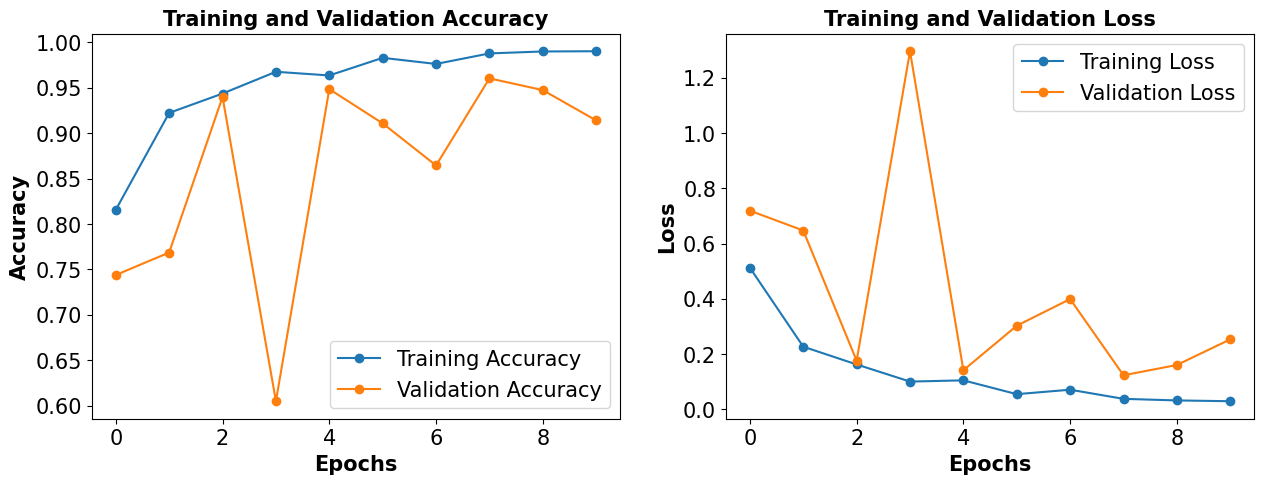

In [ ]:
# call_function_and_display_model_performance
plot_loss_curves(bees_model_his, epochs)

## Load-the-trained-model-for-prediction-on-test-dataset

In [ ]:
# laod-the-trained-model-from-given-path
honey_model = load_model('/content/drive/MyDrive/Vipin_Vinod_assignment/honey_bees_model.h5')

## The-predicted-class-labels-are-stored-in-y_preds,-whereas-the-true-class-labels-for-the-test-data-are-stored-in-y_true.-Additional-model-performance-metrics-including-accuracy,-precision,-and-recall-can-be-computed-or-a-confusion-matrix-can-be-generated-using-these.

In [ ]:
# Use-the-trained-model-to-make-predictions-on-the-test-data-generator
preds = honey_model.predict(X_bees_test)

# Extract-the-predicted-class-labels-by-finding-the-index-of-the-maximum-probability-for-each-sample
y_preds = np.argmax(preds , axis = 1)

# Extract-the-true-class-labels-from-the-labels-attribute-of-the-test-data-generator
y_true = np.argmax(y_bees_test, axis = 1)

30/30 [==============================] - 4s 114ms/step


## Following-execution-of-the-aforementioned-code,-the-training-accuracy-will-be-stored-in-the-train_acc-variable,-while-the-test_acc-variable-will-have-the-test-accuracy.-These-metrics-might-be-helpful-for-evaluating-the-trained-model-as-a-whole-and-for-learning-how-well-it-applies-to-new-data.

In [ ]:
# Evaluate-the-model-on-the-training-data-generator-and-obtain-the-loss-and-accuracy
_, train_acc = honey_model.evaluate(X_bees_train, y_bees_train, verbose=1)

# Evaluate-the-model-on-the-test-data-generator-and-obtain-the-loss-and-accuracy
_, test_acc = honey_model.evaluate(X_bees_test, y_bees_test, verbose=1)

30/30 [==============================] - 3s 115ms/step - loss: 0.1232 - accuracy: 0.9602


## Once-these-lines-of-code-are-executed,-the-weighted-F1-score,-precision-score,-and-recall-score-will-be-stored-in-the-variables-f1_scr,-precision,-and-recall,-respectively.-These-measures-offer-a-more-thorough-evaluation-of-the-model's-performance,-particularly-in-cases-where-the-class-distribution-is-uneven.

In [ ]:
# Compute-the-weighted-F1-score-using-the-true-class-labels-(y_test)-and-predicted-class-labels-(y_preds)
f1_scr = f1_score(y_true, y_preds, average='weighted')

# Compute-the-weighted-precision-score-using-the-true-class-labels-and-predicted-class-labels
precision = precision_score(y_true, y_preds, average='weighted')

# Compute-the-weighted-recall-score-using-the-true-class-labels-and-predicted-class-labels
recall = recall_score(y_true, y_preds, average='weighted')

## The-training-accuracy,-testing-accuracy,-F1-score,-precision-score,-and-recall-score-will-be-printed-out-in-the-console-after-running-these-lines-of-code.-These-metrics-give-a-complete-picture-of-the-model's-accuracy-and-its-capacity-to-correctly-classify-examples,-taking-precision-and-recall-into-consideration-as-well.

In [ ]:
# Print-the-training-accuracy
print("Training Accuracy : %.3f" %train_acc)

# Print-the-testing-accuracy
print("Testing Accuracy  : %.3f" % test_acc)

# Print-the-F1-score
print("F1 Score          : %.3f" % f1_scr)

# Print-the-precision-score
print("Precision Score   : %.3f" % precision)

# Print-the-recall-score
print("Recall Score      : %.3f" % recall)

Training Accuracy : 0.998
Testing Accuracy  : 0.960
F1 Score          : 0.958
Precision Score   : 0.959
Recall Score      : 0.960


In [13]:
# define-a-list-of-categories
TARGET_LABELS  = ['category0', 'category1', 'category2', 'category3']

## This-report-gives-a-detailed-overview-of-the-model's-performance-for-each-class-and overall-on-the-test-dataset.

In [ ]:
# print-classification-report-on-test-dataset
print(classification_report(y_true, y_preds, target_names=TARGET_LABELS))

              precision    recall  f1-score   support

   category0       0.92      0.60      0.73        55
   category1       0.96      0.99      0.97       603
   category2       0.98      0.97      0.97       180
   category3       0.97      0.99      0.98        91

    accuracy                           0.96       929
   macro avg       0.95      0.89      0.91       929
weighted avg       0.96      0.96      0.96       929



## Insights-into-the-model's-performance-for-each-class-in-terms-of-classification-mistakes-and-accuracy-will-be-provided-via-a-visual-depiction-of-the-confusion-matrix,-which-will-be-displayed-after-running-these-lines-of-code.-Depending-on-the-settings-that-are-supplied,-the-matrix-will-display-either-raw-counts-or-percentages.

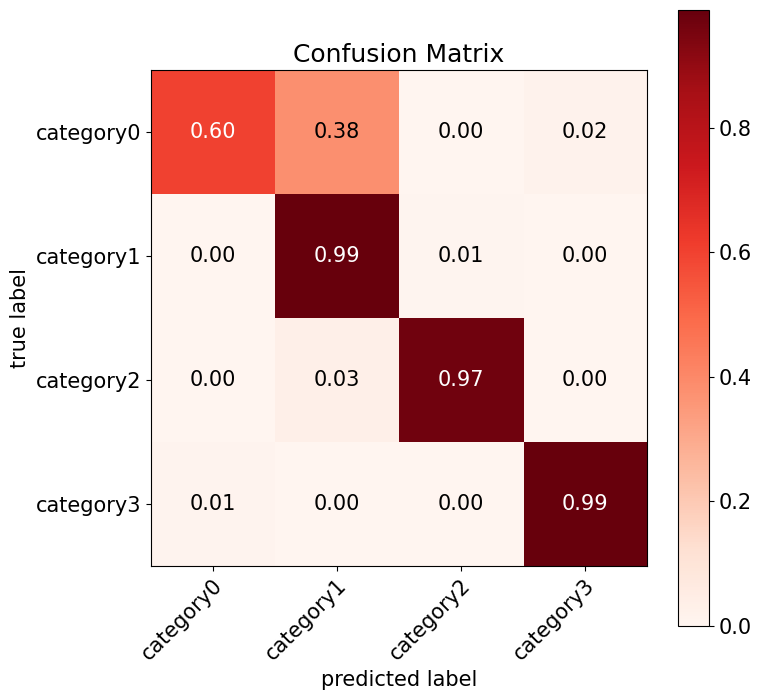

In [ ]:
# Compute-the-confusion-matrix-based-on-true-class-labels-(y_test)-and-predicted-class-labels-(y_preds)
cm_data = confusion_matrix(y_true , y_preds)

# Plot-the-confusion-matrix-using-the-mlxtend's-plot_confusion_matrix-function
fig, ax = plot_confusion_matrix(conf_mat=cm_data,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                figsize=(8, 8), cmap='Reds',
                                class_names=TARGET_LABELS)  # Use percentages instead of raw counts
# Set-the-title-of-the-plot
plt.title("Confusion Matrix")

# Display-the-plot
plt.show()

## If-you-have-a-multiclass-classification-problem,-this-code-will-show-you-the-ROC-curves-and-AUC-scores-for-each-class-graphically.-For-different-probability-thresholds,-the-ROC-curve-can-be-used-to-evaluate-the-trade-off-between-the-true-positive-rate-and-the-false-positive-rate.

ROC AUC score: 0.9309044588701745


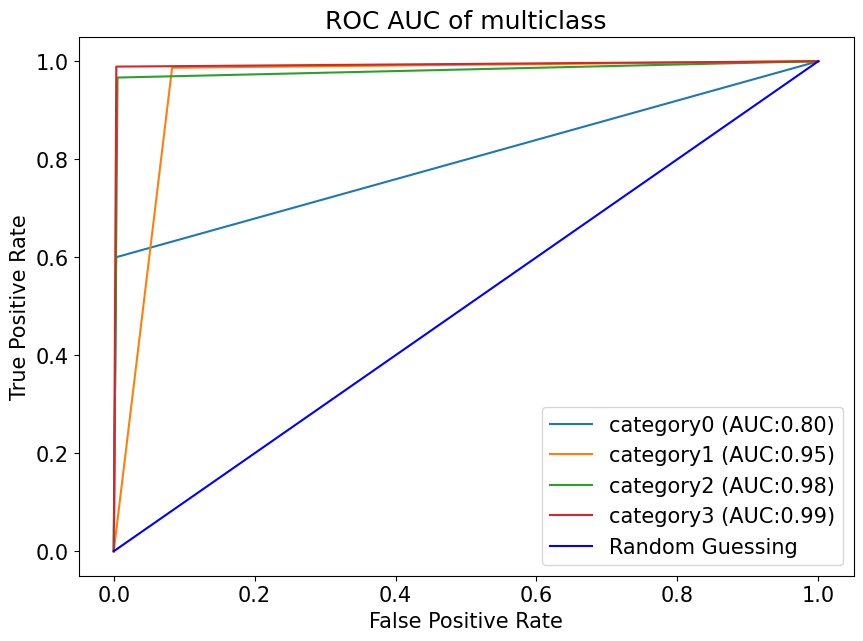

In [ ]:
# Create a subplot for ROC curve visualization
fig, c_ax = plt.subplots(1,1, figsize = (10, 7))

# Define a function for computing and plotting the multiclass ROC curve and AUC scores
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  # Use LabelBinarizer to transform true and predicted class labels
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)

  # Plot ROC curve and compute AUC scores for each class
  for (idx, c_label) in enumerate(TARGET_LABELS):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))

  # Plot the diagonal line for random guessing
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')

  # Compute and return the overall ROC AUC score
  return roc_auc_score(y_test, y_pred, average=average)

# Call the multiclass_roc_auc_score function and display the ROC curve plot
print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_preds))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.title("ROC AUC of multiclass")
plt.show()

## To-get-a-picture-ready-to-be-fed-into-a-model,-this-function-checks-that-it-is-in-the-right-colour-space-(RGB)-and-has-the-right-dimensions.-Before-feeding-photos-into-a-machine-learning-model-for-prediction,-you-can-use-this-function-to-do-some-preprocessing.

In [ ]:
def data_prepare(image_path):
  """
    Preprocesses an image for input to the model.

    Parameters:
    - image_path (str): Path to the input image file.

    Returns:
    - img (numpy.ndarray): Processed image array.
  """
  # Read-the-image-using-OpenCV
  img = cv2.imread(image_path)

  # Convert-the-color-space-from-BGR-to-RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Resize-the-image-to-the-required-input-size-of-the-model-(224x224)
  img = cv2.resize(img, (224, 224))

  return img

## For-easy-evaluations-and-demonstrations,-this-function-visualizes-the-predictions-of-a-pre-trained-model-on-a-given-image.

In [ ]:
def model_prediction(file_path):
  # Preprocess-the-image-using-the-data_prepare-function
  img = data_prepare(file_path)

  # Reshape-the-image-for-model-prediction
  resize_img = img.reshape(-1, 224, 224, 3)

  # Make-a-prediction-using-the-pre-trained-model
  prediction = honey_model.predict(resize_img, verbose=False)

  # Get-the-index-of-the-predicted-class
  idx = np.argmax(prediction)

  # Display-the-original-image-with-the-predicted-class-label
  plt.imshow(img)

  # set-title-as-predicted-label
  plt.title(TARGET_LABELS[idx])

  # remove-xticks-points
  plt.xticks([])

  # remove-yticks-points
  plt.yticks([])

  # display-the-image
  plt.show();

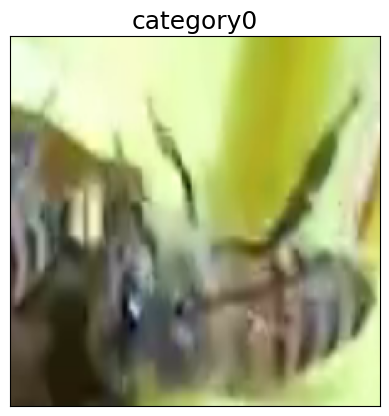

In [ ]:
# Specify-the-file-path-to-the-test-image
file_path = "/content/bees/test/category0/041_023.png"
model_prediction(file_path)

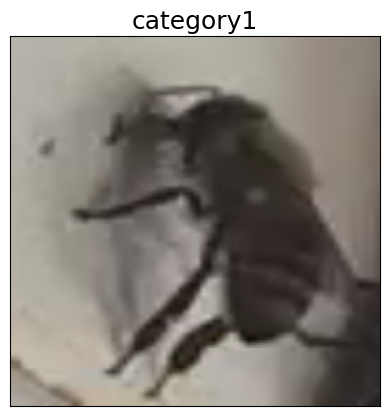

In [ ]:
# Specify-the-file-path-to-the-test-image
file_path = "/content/bees/test/category1/001_050.png"
model_prediction(file_path)

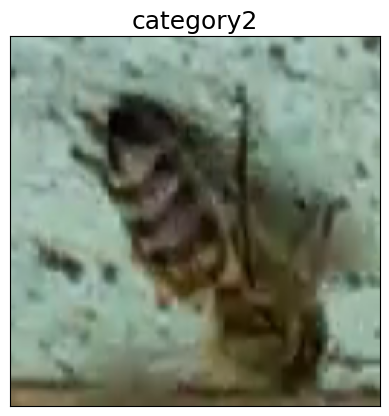

In [ ]:
# Specify-the-file-path-to-the-test-image
file_path = "/content/bees/test/category2/031_113.png"
model_prediction(file_path)

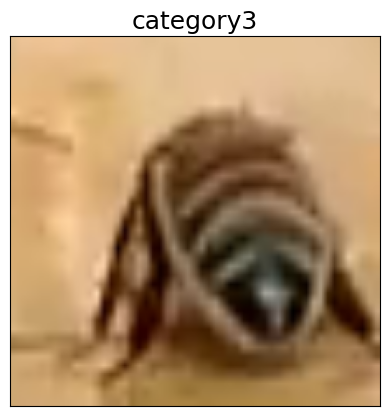

In [ ]:
# Specify-the-file-path-to-the-test-image
file_path = "/content/bees/test/category3/030_175.png"
model_prediction(file_path)

# **This-code-defines-a-Convolutional-Neural-Network-(CNN)-using-the-Keras library,-which-is-commonly-used-for-building-deep-learning-models.-The CNN-architecture-is-designed-for-image-classification-tasks,-where-the input-images-are-expected-to-have-a-shape-of-(224, 224, 3), representing-a-224x224-pixel-image-with-three-color-channels-(RGB).**

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3,), activation='relu', input_shape = (224, 224, 3)))
cnn.add(Conv2D(32, (3, 3,), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3,), activation='relu'))
cnn.add(Conv2D(64, (3, 3,), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(128, (3, 3,), activation='relu'))
cnn.add(Conv2D(128, (3, 3,), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(128, (3, 3,), activation='relu'))
cnn.add(Conv2D(128, (3, 3,), activation='relu'))
cnn.add(Conv2D(128, (3, 3,), activation='relu'))
cnn.add(Conv2D(128, (3, 3,), activation='relu'))


cnn.add(Flatten())
cnn.add(Dense(units=1024, activation='relu'))
cnn.add(Dense(units=4, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

## The-following-hyperparameters-have-been-established-for-the-neural-network-training:-the-learning-rate-(lr)-is-defined-as-0.001,-the-number-of-training-epochs-are-set-to-10,-and-the-batch-size-for-training-is-set-to-32.-For-jobs-involving-many-classes,-the-categorical-crossentropy-loss-function-(ls_fun)-is-selected.-The-model-is-then-built-using-the-compile-technique,-with-the-following-parameters:-the-Adam-optimizer's-learning-rate-is-defined,-the-measure-to-be-monitored-during-training-is-accuracy,-and-the-categorical-crossentropy-loss-is-supplied.

In [15]:
# Import-necessary-modules-from-Keras
from keras.optimizers import Adam

# Set-hyperparameters-for-training
epochs = 10  # Number-of-training-epochs
batch_size = 32  # Batch-size-for-training
ls_fun = 'categorical_crossentropy'  # Loss-function-for-categorical-classification

# Compile-the-model-with-specified-loss,-optimizer,-and-metrics
cnn.compile(loss=ls_fun,  # Categorical-crossentropy-loss-for-multiclass-classification
              optimizer=Adam(learning_rate=0.001),  # Adam-optimizer-with-specified-learning-rate
              metrics=['accuracy'])  # Monitor-accuracy-during-training

## The-training-method-makes-use-of-the-supplied-batch-size,-validation-data,-and-number-of-epochs.-You-may-make-sure-that-the-most-accurate-model-based-on-validation-is-saved-during-training-by-including-the-previously-created-ModelCheckpoint-callback-in-the-callbacks-parameter.

## Information-about-training-and-validation-loss-as-well-as-accuracy-for-each-epoch-is-kept-in-the-bees_model_his-variable,-which-is-part-of-the-training-history.

In [16]:
# Train-the-model-and-store-the-training-history
cnn_bees_model_his = cnn.fit(X_bees_train,  # Training-features
                           y_bees_train,  # Training-labels
                           epochs=epochs,  # Number-of-epochs-for-training
                           batch_size=batch_size,  # Batch-size-for-training
                           validation_data=(X_bees_test, y_bees_test))

Epoch 1/10
117/117 [==============================] - 14s 38ms/step - loss: 1.4468 - accuracy: 0.7167 - val_loss: 1.8490 - val_accuracy: 0.2454
Epoch 2/10
117/117 [==============================] - 3s 23ms/step - loss: 0.6475 - accuracy: 0.7658 - val_loss: 0.5176 - val_accuracy: 0.7912
Epoch 3/10
117/117 [==============================] - 3s 23ms/step - loss: 0.4566 - accuracy: 0.8277 - val_loss: 0.4825 - val_accuracy: 0.8213
Epoch 4/10
117/117 [==============================] - 3s 23ms/step - loss: 0.6862 - accuracy: 0.7660 - val_loss: 0.6884 - val_accuracy: 0.7621
Epoch 5/10
117/117 [==============================] - 3s 23ms/step - loss: 0.7021 - accuracy: 0.7614 - val_loss: 0.6080 - val_accuracy: 0.7729
Epoch 6/10
117/117 [==============================] - 3s 23ms/step - loss: 0.6091 - accuracy: 0.7574 - val_loss: 0.5746 - val_accuracy: 0.7793
Epoch 7/10
117/117 [==============================] - 3s 22ms/step - loss: 0.6182 - accuracy: 0.7725 - val_loss: 0.4414 - val_accuracy: 0.835

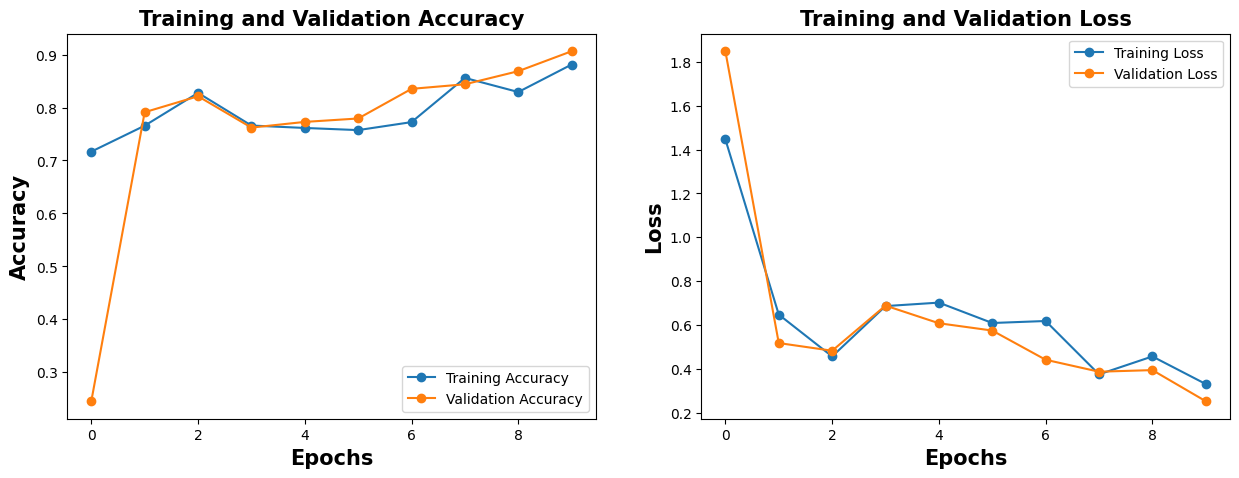

In [17]:
plot_loss_curves(cnn_bees_model_his, epochs)

## The-predicted-class-labels-are-stored-in-y_preds,-whereas-the-true-class-labels-for-the-test-data-are-stored-in-y_true.-Additional-model-performance-metrics-including-accuracy,-precision,-and-recall-can-be-computed-or-a-confusion-matrix-can-be-generated-using-these.

In [18]:
# Use-the-trained-model-to-make-predictions-on-the-test-data-generator
preds = cnn.predict(X_bees_test)

# Extract-the-predicted-class-labels-by-finding-the-index-of-the-maximum-probability-for-each-sample
y_preds = np.argmax(preds , axis = 1)

# Extract-the-true-class-labels-from-the-labels-attribute-of-the-test-data-generator
y_true = np.argmax(y_bees_test, axis = 1)

30/30 [==============================] - 0s 8ms/step


## Following-execution-of-the-aforementioned-code,-the-training-accuracy-will-be-stored-in-the-train_acc-variable,-while-the-test_acc-variable-will-have-the-test-accuracy.-These-metrics-might-be-helpful-for-evaluating-the-trained-model-as-a-whole-and-for-learning-how-well-it-applies-to-new-data.

In [19]:
# Evaluate-the-model-on-the-training-data-generator-and-obtain-the-loss-and-accuracy
_, train_acc = cnn.evaluate(X_bees_train, y_bees_train, verbose=1)

# Evaluate-the-model-on-the-test-data-generator-and-obtain-the-loss-and-accuracy
_, test_acc = cnn.evaluate(X_bees_test, y_bees_test, verbose=1)

30/30 [==============================] - 0s 8ms/step - loss: 0.2522 - accuracy: 0.9064


## Once-these-lines-of-code-are-executed,-the-weighted-F1-score,-precision-score,-and-recall-score-will-be-stored-in-the-variables-f1_scr,-precision,-and-recall,-respectively.-These-measures-offer-a-more-thorough-evaluation-of-the-model's-performance,-particularly-in-cases-where-the-class-distribution-is-uneven.

In [20]:
# Compute-the-weighted-F1-score-using-the-true-class-labels-(y_test)-and-predicted-class-labels-(y_preds)
f1_scr = f1_score(y_true, y_preds, average='weighted')

# Compute-the-weighted-precision-score-using-the-true-class-labels-and-predicted-class-labels
precision = precision_score(y_true, y_preds, average='weighted')

# Compute-the-weighted-recall-score-using-the-true-class-labels-and-predicted-class-labels
recall = recall_score(y_true, y_preds, average='weighted')

## The-training-accuracy,-testing-accuracy,-F1-score,-precision-score,-and-recall-score-will-be-printed-out-in-the-console-after-running-these-lines-of-code.-These-metrics-give-a-complete-picture-of-the-model's-accuracy-and-its-capacity-to-correctly-classify-examples,-taking-precision-and-recall-into-consideration-as-well.

In [21]:
# Print-the-training-accuracy
print("Training Accuracy : %.3f" %train_acc)

# Print-the-testing-accuracy
print("Testing Accuracy  : %.3f" % test_acc)

# Print-the-F1-score
print("F1 Score          : %.3f" % f1_scr)

# Print-the-precision-score
print("Precision Score   : %.3f" % precision)

# Print-the-recall-score
print("Recall Score      : %.3f" % recall)

Training Accuracy : 0.918
Testing Accuracy  : 0.906
F1 Score          : 0.904
Precision Score   : 0.904
Recall Score      : 0.906


## This-report-gives-a-detailed-overview-of-the-model's-performance-for-each-class-and overall-on-the-test-dataset.

In [22]:
# print-classification-report-on-test-dataset
print(classification_report(y_true, y_preds, target_names=TARGET_LABELS))

              precision    recall  f1-score   support

   category0       0.59      0.45      0.51        42
   category1       0.92      0.96      0.94       614
   category2       0.97      0.87      0.92       194
   category3       0.78      0.82      0.80        79

    accuracy                           0.91       929
   macro avg       0.82      0.78      0.79       929
weighted avg       0.90      0.91      0.90       929



##Insights-into-the-model's-performance-for-each-class-in-terms-of-classification-mistakes-and-accuracy-will-be-provided-via-a-visual-depiction-of-the-confusion-matrix,-which-will-be-displayed-after-running-these-lines-of-code.-Depending-on-the-settings-that-are-supplied,-the-matrix-will-display-either-raw-counts-or-percentages.

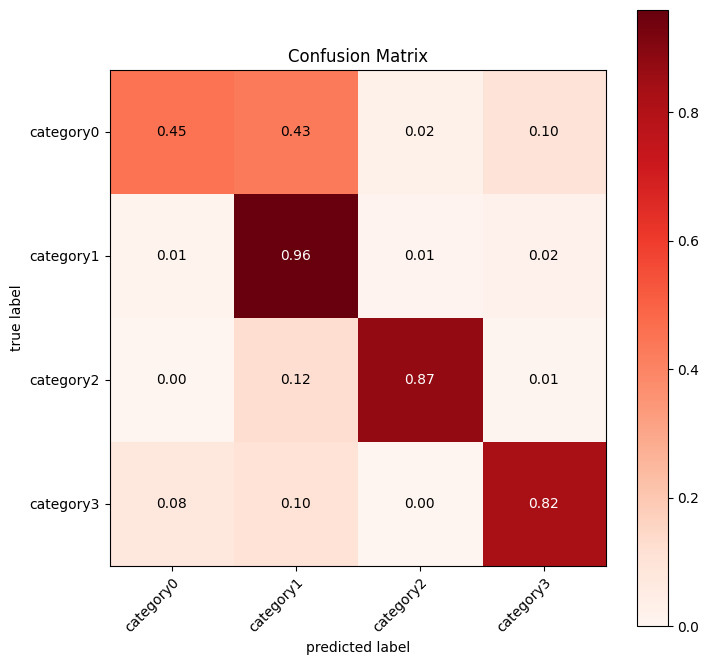

In [23]:
# Compute-the-confusion-matrix-based-on-true-class-labels-(y_test)-and-predicted-class-labels-(y_preds)
cm_data = confusion_matrix(y_true , y_preds)

# Plot-the-confusion-matrix-using-the-mlxtend's-plot_confusion_matrix-function
fig, ax = plot_confusion_matrix(conf_mat=cm_data,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                figsize=(8, 8), cmap='Reds',
                                class_names=TARGET_LABELS)  # Use percentages instead of raw counts
# Set-the-title-of-the-plot
plt.title("Confusion Matrix")

# Display-the-plot
plt.show()

If-you-have-a-multiclass-classification-problem,-this-code-will-show-you-the-ROC-curves-and-AUC-scores-for-each-class-graphically.-For-different-probability-thresholds,-the-ROC-curve-can-be-used-to-evaluate-the-trade-off-between-the-true-positive-rate-and-the-false-positive-rate.

ROC AUC score: 0.8628571414771341


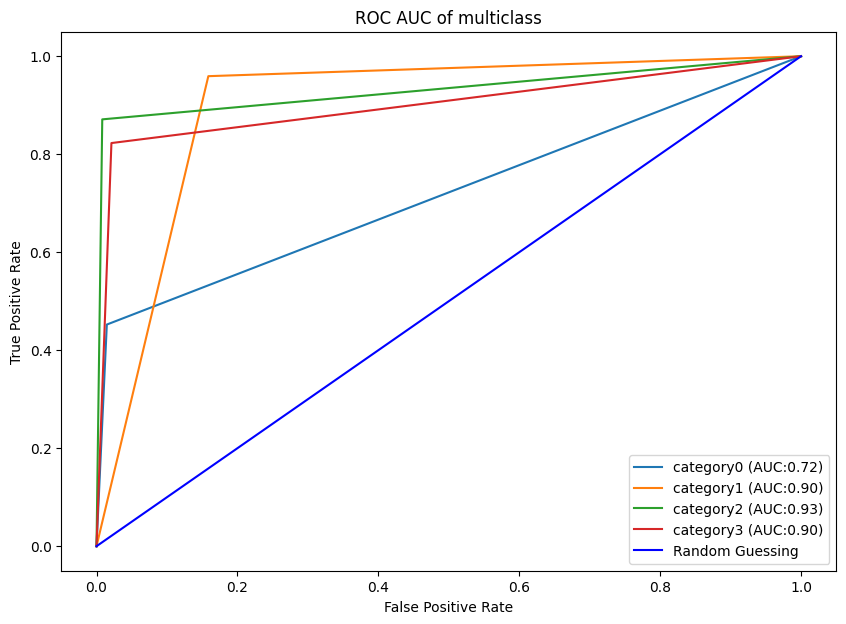

In [24]:
# Create a subplot for ROC curve visualization
fig, c_ax = plt.subplots(1,1, figsize = (10, 7))

# Define a function for computing and plotting the multiclass ROC curve and AUC scores
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  # Use LabelBinarizer to transform true and predicted class labels
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)

  # Plot ROC curve and compute AUC scores for each class
  for (idx, c_label) in enumerate(TARGET_LABELS):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))

  # Plot the diagonal line for random guessing
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')

  # Compute and return the overall ROC AUC score
  return roc_auc_score(y_test, y_pred, average=average)

# Call the multiclass_roc_auc_score function and display the ROC curve plot
print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_preds))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.title("ROC AUC of multiclass")
plt.show()